# Main for cutting videos in mri experiments 

Import function from video_cut_functions, you can change the path if the file is somewhere else.

In [6]:
import sys
import shutil
import pickle
import IPython

sys.path.append('/Documents/DeepProprioception/Vision_Project')
from video_cut_functions import *

### Get videos

Get videos, experiment information path, tablet responses and stimulus informations. The filenames variable is a simple list with all videos found in camera folders. `output_paths` creates a folder and gives you paths to be use for broadcuts per camera and per run as a dictionnary with list values.

In [7]:
%matplotlib inline
name = "DP04"
date = "20220802"
exp_type = "mri"
filenames, info_path, output_paths, behav_paths, stimulus_paths = load_project(name, date, exp_type)
print("Found the following videos:", filenames)
print("Loading the following infos:", info_path)
print("Loading behav infos:", behav_paths)
print("Loading stimulus infos:", stimulus_paths)

Found the following videos: ['/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/1_01_R_20220802083840.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/1_02_R_20220802083838.mp4']
Loading the following infos: /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/20220802_DP04_mri_experiment_info.csv
Loading behav infos: ['/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Tablet/20220802_DP04_mri_run1_response.csv', '/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Tablet/20220802_DP04_mri_run2_response.csv', '/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Tablet/20220802_DP04_mri_run3_response.csv']
Loading stimulus infos: ['/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Stimulus/20220802_DP04_mri_run1_stimulus.csv', '/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Stimulus/20220802_DP04_mri_run2_stimulus.csv', '/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Stimulus/20220802_DP04_mri_run3_stimulus.csv']


### Broad cut videos

Videos from MRI experiment are very long (few hours) and contain all the recording for multiple runs. The broad cut function uses a small trained neural network model to classify numbers written in the date and compare it to `experiment_info.csv` files. It gives a list of start and stop times for each runs. The model is uses Tensorflow 2. There is a visualization feature to plot the bounding boxes so you can manually compare with predicted values.

2022-08-31 16:34:32.386767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 16:34:32.442611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 16:34:32.442831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 16:34:32.443728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1/1 [==============================] - 3s 3s/step


2022-08-31 16:34:36.559124: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-31 16:34:36.614094: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 23ms/step


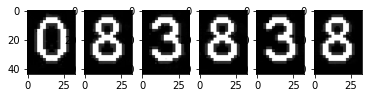

[0, 8, 3, 8, 3, 8]
video start time [16597.88977, 17394.415829999998, 18276.7238]
video stop time [17528.562940000003, 18325.08146, 19207.250079999998]
1/1 [==============================] - 0s 23ms/step


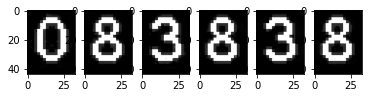

[0, 8, 3, 8, 3, 8]
video start time [16597.88977, 17394.415829999998, 18276.7238]
video stop time [17528.562940000003, 18325.08146, 19207.250079999998]
{'Camera_1': [16597.88977, 17394.415829999998, 18276.7238], 'Camera_2': [16597.88977, 17394.415829999998, 18276.7238]} {'Camera_1': [17528.562940000003, 18325.08146, 19207.250079999998], 'Camera_2': [17528.562940000003, 18325.08146, 19207.250079999998]}


In [8]:
model_weights = "/home/andy/Documents/DeepProprioception/Vision_Project/pretrained_model"
start_list = {}
stop_list = {}
for filename in filenames:
    cam_num = os.path.basename((os.path.dirname(filename)))
    output_path = output_paths[cam_num]
    start_time, stop_time = broad_cut(filename, info_path, output_path, model_weights, vis = 1, margin = [100,100], gpu = 0)
    start_list[cam_num] = start_time
    stop_list[cam_num] = stop_time
print(start_list, stop_list)

temp_store(filenames, info_path, output_paths, behav_paths, stimulus_paths, name, date, exp_type, start_list, stop_list)


In [ ]:
import os
os._exit(00)

Broad cut all videos using the start and stop times of the broad cut function.

In [1]:
import sys
import shutil
import pickle
import IPython
sys.path.append('/home/andy/Documents/DeepProprioception/Vision_Project')
from video_cut_functions import *
filenames, info_path, output_paths, behav_paths, stimulus_paths, name, date, exp_type, start_list, stop_list = load_temp()
print(filenames)
cut_all_videos(filenames, start_list, stop_list, output_paths, typeofvid = "mri")

['/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/1_01_R_20220802083840.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/1_02_R_20220802083838.mp4']
Moviepy - Building video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_1_bcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_1_bcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_1_bcut.mp4
Moviepy - Building video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_2_bcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_2_bcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_2_bcut.mp4
Moviepy - Building video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_3_bcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_3_bcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_3_bcut.mp4
Moviepy - Building video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_1_bcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_1_bcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_1_bcut.mp4
Moviepy - Building video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_2_bcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_2_bcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_2_bcut.mp4
Moviepy - Building video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_3_bcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_3_bcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_3_bcut.mp4


### Find light pixel position

You can extract multiple frames from this video to locate the laser or LED position in pixel. It can only be seen by pointing with the mouse if you are using `%matplotlib notebook`, You can also zoom in using the notebook features on the bottom of the figures. Frames are given in seconds and you can see the duration of the video to select the lastest frames. The plot function will show figures for each camera, frame in each lines and columns for each run.

Duration of : 20220802_DP04_mri_cam_1_run_1_bcut.mp4  :  930.7
Duration of : 20220802_DP04_mri_cam_1_run_2_bcut.mp4  :  930.67
Duration of : 20220802_DP04_mri_cam_1_run_3_bcut.mp4  :  930.53
Duration of : 20220802_DP04_mri_cam_2_run_1_bcut.mp4  :  930.7
Duration of : 20220802_DP04_mri_cam_2_run_2_bcut.mp4  :  930.67
Duration of : 20220802_DP04_mri_cam_2_run_3_bcut.mp4  :  930.53


<IPython.core.display.Javascript object>


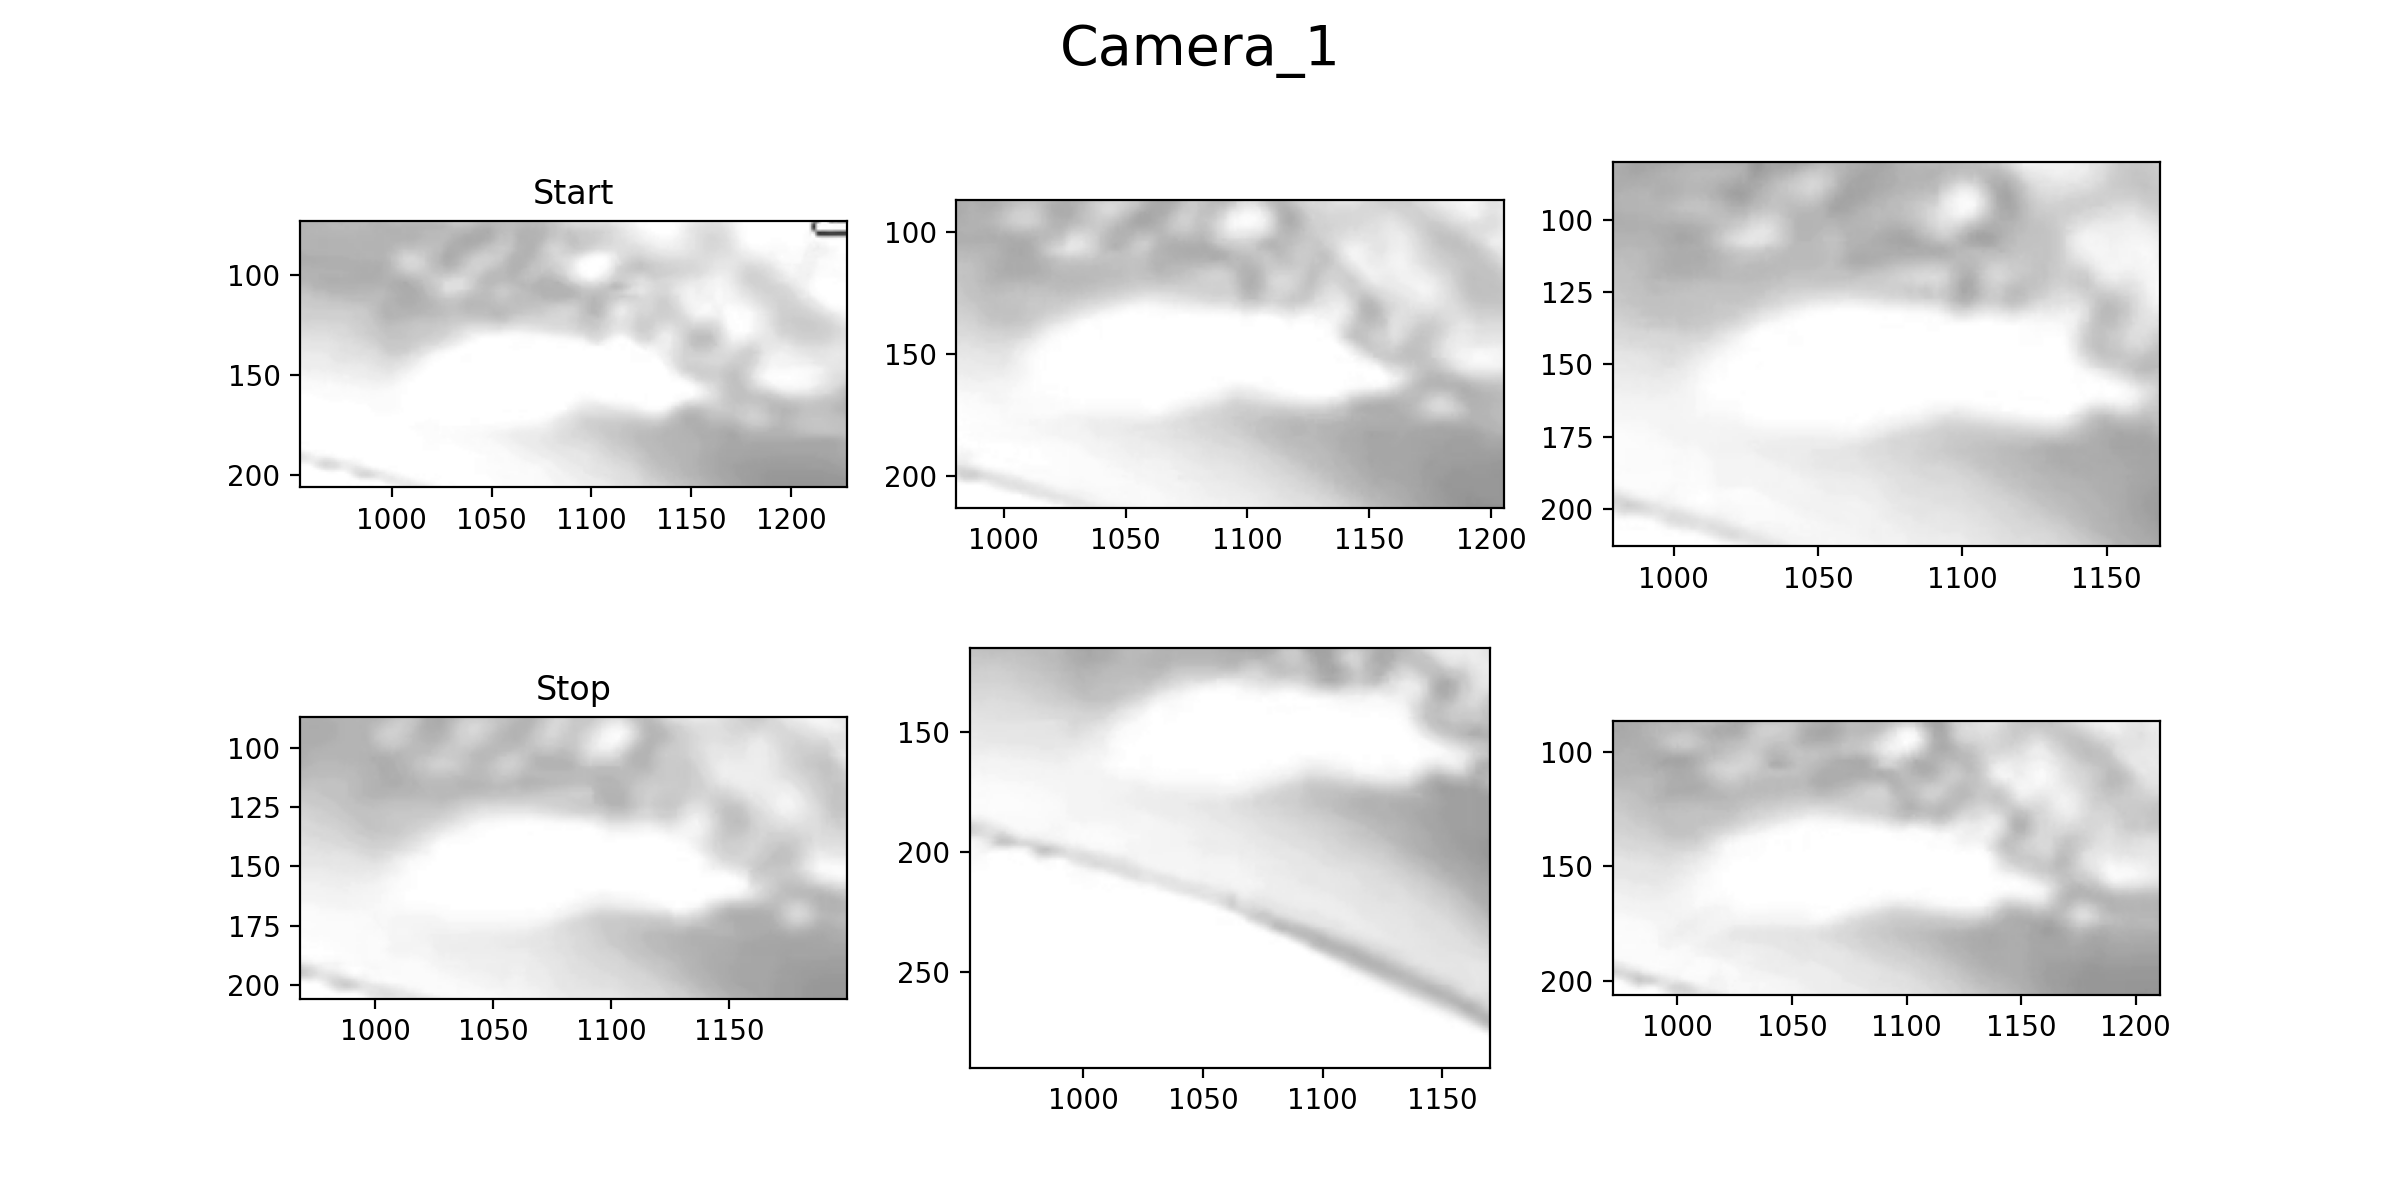

<IPython.core.display.Javascript object>


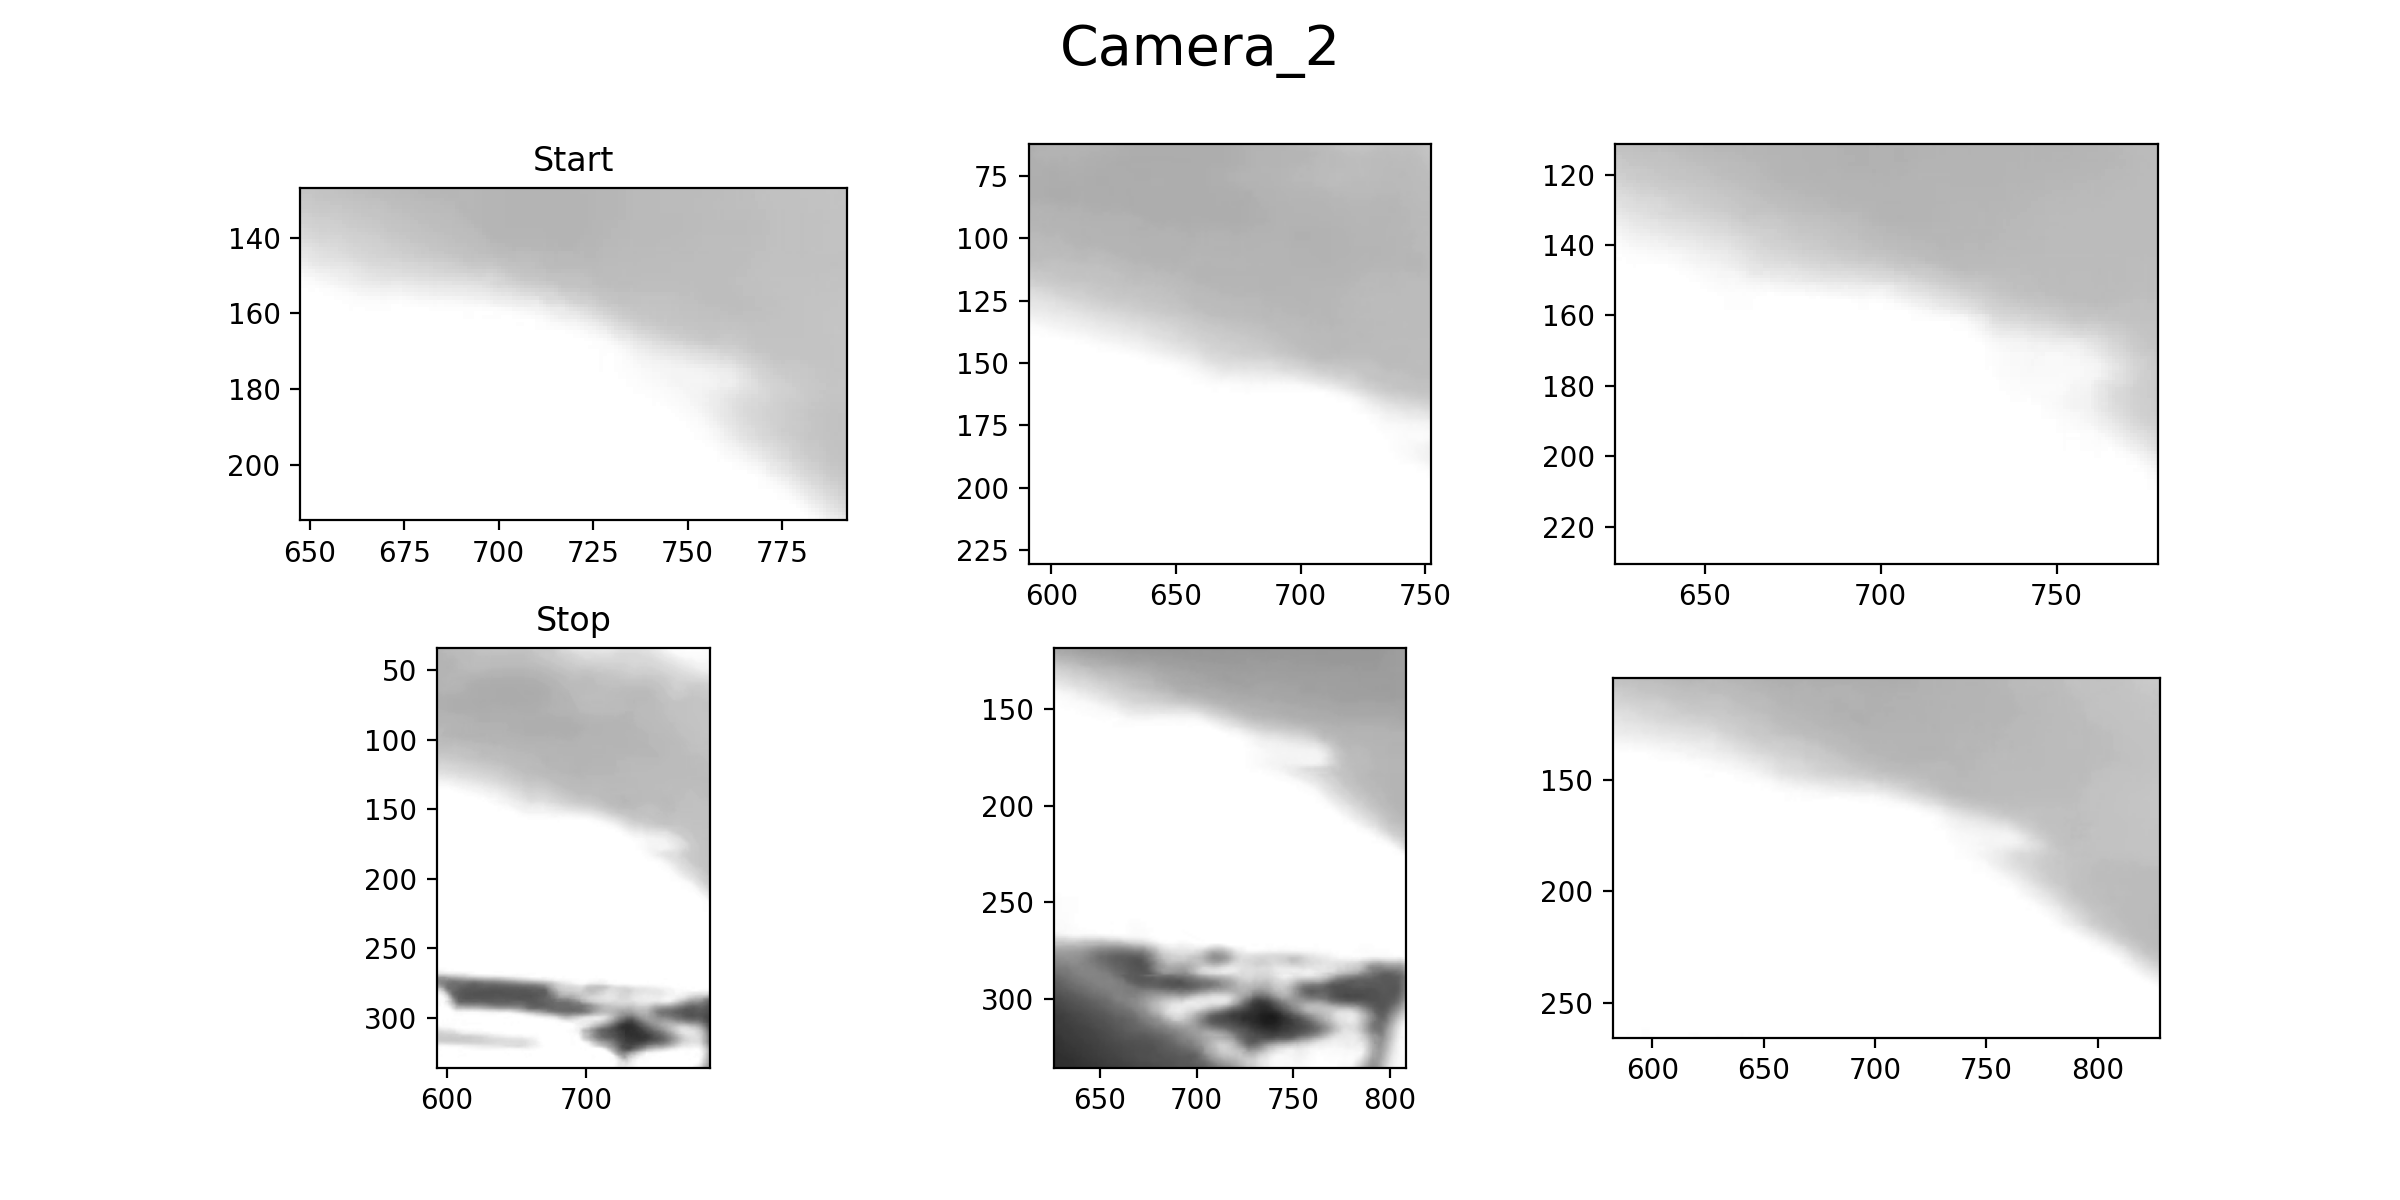

In [3]:
%matplotlib notebook
frames = [80, 810] #[45,47,862,775,773 # demo with YH data 
img_dict = extract_one_frame(output_paths, frames=frames, typeofvideo = "mri")
plot_all_frames(img_dict, len(frames), typeofvid = "mri", frames = frames)

### From light variation, get start and stop times

You can insert the Light location in pixel in the `led_locations` variable for each camera, in start (beggining of the video) and stop (end of the video) (in case the light moved along the video) as `[[X_run1, Y_run1],[X_run1, Y_run2], ...]`. You can turn vis to `True` to see the values of the pixel before cut, this can provide informations on the noise level to regulate the threshold value. The window size is given in seconds and covers windows at the beggining of the videos and at the end of the video sequentially for each video.

In [ ]:
# If you cannot find the laser you can delete the file reference in the output_paths variable and it will not consider it for further analysis
# example : del output_paths["Camera_1"][2]

iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_1_bcut.mp4


2384it [00:23, 101.67it/s]


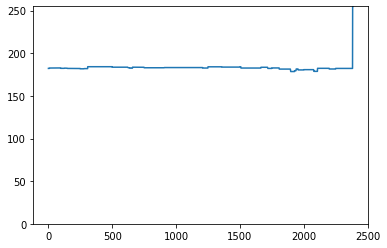

3563it [00:32, 109.62it/s]


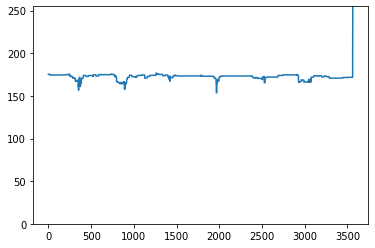

iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_2_bcut.mp4


388it [00:02, 179.05it/s]


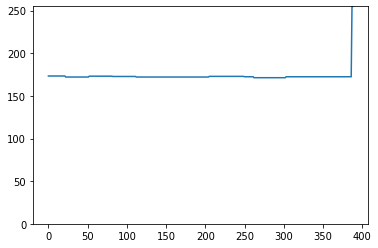

3541it [00:20, 174.14it/s]


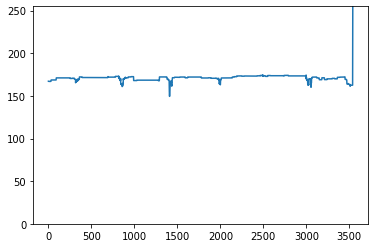

iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_1/bcut/20220802_DP04_mri_cam_1_run_3_bcut.mp4


2339it [00:13, 173.61it/s]


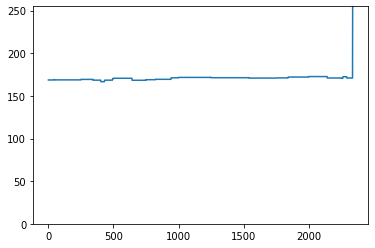

3513it [00:19, 181.59it/s]


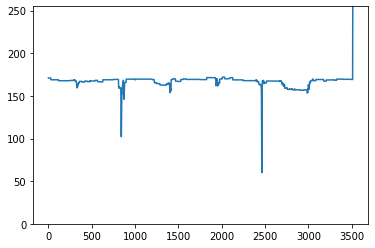

iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_1_bcut.mp4


7500it [00:43, 170.49it/s]


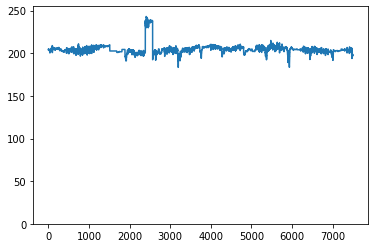

3607it [00:19, 185.78it/s]


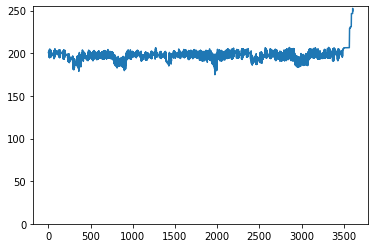

iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_2_bcut.mp4


7500it [00:41, 180.38it/s]


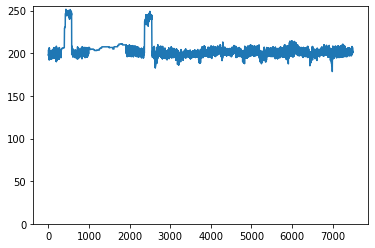

7200it [00:39, 180.93it/s]


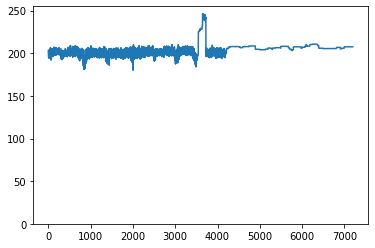

iteration for video /mnt/sdb2/DeepDraw/Projects/20220802_DP04_mri/Camera_2/bcut/20220802_DP04_mri_cam_2_run_3_bcut.mp4


7500it [00:49, 150.33it/s]


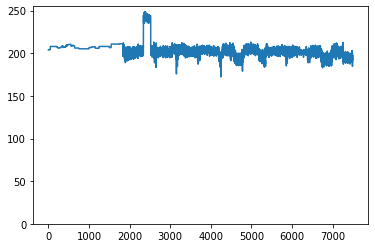

7200it [00:39, 183.34it/s]


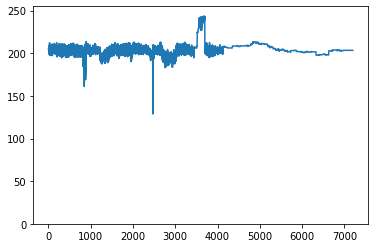

{'Camera_1': [2384, 388, 2339], 'Camera_2': [0, 0, 0]} {'Camera_1': [24284, 24261, 24228], 'Camera_2': [24328, 20720, 20715]}


In [4]:
%matplotlib inline

#led_locations = {"Camera_1": {"start": [[1163,219],[1162,217],[1141,200]], "stop": [[1164,218],[1145,205],[1137,201]]},
#                 "Camera_2": {"start": [[837,39],[824,45],[780,11]], "stop": [[814,49],[777,16],[783,24]]}} # Demo with YH data
# del output_paths["Camera_1"]

led_locations = {"Camera_1": {"start": [[1050,150],[1050,150],[1050,150]], "stop": [[1050,150],[1050,150],[1050,150]]}, 
                 "Camera_2": {"start": [[760,180],[760,180],[760,180]], "stop": [[760,180],[760,180],[760,180]]}}
start_list, stop_list = get_startendpoint(output_paths, led_locations, threshold = 50, radius = 1, window_size = [250,240], vis = True)
print(start_list, stop_list)

In [21]:
start_list['Camera_1'][2] = 2597
start_list

{'Camera_1': [2643, 2620, 2597], 'Camera_2': [2643, 2619, 2597]}

In [22]:
# del output_paths["Camera_2"][2]
# del output_paths["Camera_2"][2]
print(output_paths)

{'Camera_1': ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/bcut/20220802_DP03_mri_cam_1_run_1_bcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/bcut/20220802_DP03_mri_cam_1_run_2_bcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/bcut/20220802_DP03_mri_cam_1_run_3_bcut.mp4'], 'Camera_2': ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/bcut/20220802_DP03_mri_cam_2_run_1_bcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/bcut/20220802_DP03_mri_cam_2_run_2_bcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/bcut/20220802_DP03_mri_cam_2_run_3_bcut.mp4']}


### Fine cut videos

Now you can cut all videos according to start and stop times

In [3]:
fcut_output_paths = get_output_paths(output_paths)
print(fcut_output_paths)
cut_all_videos(output_paths, start_list, stop_list, fcut_output_paths, frame = True)

{'Camera_1': ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/fcut/20220802_DP03_mri_cam_1_run_1_fcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/fcut/20220802_DP03_mri_cam_1_run_2_fcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/fcut/20220802_DP03_mri_cam_1_run_3_fcut.mp4'], 'Camera_2': ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/fcut/20220802_DP03_mri_cam_2_run_1_fcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/fcut/20220802_DP03_mri_cam_2_run_2_fcut.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/fcut/20220802_DP03_mri_cam_2_run_3_fcut.mp4']}


### Stretch videos

If videos have a different framing rate, you need to stretch the videos according to the experiment info times and set the fps to 30.

In [4]:
fcut_output_paths = get_output_paths(output_paths)
fcut_videos = fcut_output_paths
output_path_str = get_output_paths(output_paths, stretch =True)stretch_videos(fcut_videos, info_path, output_path_str, exp_type = "mri")

### Stimulus cut 

In order to compute trajectory separately we need to cut the videos per trajectories. Know that we should train DLC models using fcut videos and use the pretrained model to analyze each trajectories separately. (Training on long videos is more adapted for labeling).

In [5]:
output_path_str = get_output_paths(output_paths, stretch =True)
stretch_videos_paths = output_path_str
print(stretch_videos_paths)
print(behav_paths)
print(stimulus_paths)
stimulus_cut(stretch_videos_paths,behav_paths, stimulus_paths, behav_cut= True, watcom = False, typeofcut = "mri")
print('Its done')

{'Camera_1': ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/str/20220802_DP03_mri_cam_1_run_1_str.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/str/20220802_DP03_mri_cam_1_run_2_str.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_1/str/20220802_DP03_mri_cam_1_run_3_str.mp4'], 'Camera_2': ['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/str/20220802_DP03_mri_cam_2_run_1_str.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/str/20220802_DP03_mri_cam_2_run_2_str.mp4', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Camera_2/str/20220802_DP03_mri_cam_2_run_3_str.mp4']}
['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Tablet/20220802_DP03_mri_run1_response.csv', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Tablet/20220802_DP03_mri_run2_response.csv', '/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Tablet/20220802_DP03_mri_run3_response.csv']
['/mnt/sdb2/DeepDraw/Projects/20220802_DP03_mri/Stimulus/20220802_DP03_mri_run1_stimulus.csv',

100%|██████████| 39/39 [02:13<00:00,  3.42s/it]


Finished camera 1 run 1


100%|██████████| 39/39 [01:45<00:00,  2.71s/it]


Finished camera 1 run 2


100%|██████████| 39/39 [01:44<00:00,  2.69s/it]


Finished camera 1 run 3


100%|██████████| 39/39 [01:42<00:00,  2.63s/it]


Finished camera 2 run 1


100%|██████████| 39/39 [01:43<00:00,  2.65s/it]


Finished camera 2 run 2


100%|██████████| 39/39 [01:44<00:00,  2.69s/it]

Finished camera 2 run 3
Its done
